In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import cvxopt as opt
from cvxopt import blas, solvers
from pandas_datareader import data as web

In [2]:
# group tickers in a list
symbols = ['AAPL','AMZN','MSFT','FB','BABA','GOOG','NFLX','SHOP','NVDA','ZM']
# set dates 
start_date = "2020-03-23" 
end_date = "2020-07-28"
# extract data from yahoo
stock_data = web.get_data_yahoo(symbols,start_date,end_date)

# show data
print(stock_data.head(5))
print(stock_data['Adj Close'].head(5)) # choose the Adj Close attribute table

Attributes  Adj Close                                                   \
Symbols          AAPL         AMZN        MSFT          FB        BABA   
Date                                                                     
2020-03-23  55.566658  1902.829956  134.301956  148.100006  176.339996   
2020-03-24  61.141407  1940.099976  146.509430  160.979996  185.750000   
2020-03-25  60.804588  1885.839966  145.106949  156.210007  188.559998   
2020-03-26  64.004311  1955.489990  154.183533  163.339996  195.320007   
2020-03-27  61.354385  1900.099976  147.852631  156.789993  188.589996   

Attributes                                                               ...  \
Symbols            GOOG        NFLX        SHOP        NVDA          ZM  ...   
Date                                                                     ...   
2020-03-23  1056.619995  360.269989  375.390015  212.393311  159.559998  ...   
2020-03-24  1134.459961  357.320007  430.000000  248.832397  135.179993  ...   
2020-03

Symbols          AAPL         AMZN        MSFT          FB        BABA  \
Date                                                                     
2020-03-23  55.566658  1902.829956  134.301956  148.100006  176.339996   
2020-04-23  68.112923  2399.449951  169.304611  185.130005  205.240005   
2020-05-22  79.188927  2436.879883  181.750183  234.910004  199.699997   
2020-06-23  91.019203  2764.409912  199.973740  242.240005  228.750000   
2020-07-23  92.223587  2986.550049  200.597687  232.600006  251.880005   

Symbols            GOOG        NFLX        SHOP        NVDA          ZM  
Date                                                                     
2020-03-23  1056.619995  360.269989  375.390015  212.393311  159.559998  
2020-04-23  1276.310059  426.700012  620.489990  283.613831  169.089996  
2020-05-22  1410.420044  429.320007  825.169983  360.546387  171.059998  
2020-06-23  1464.410034  466.260010  911.340027  377.644989  252.809998  
2020-07-23  1515.680054  477.579987  

<Figure size 1440x720 with 0 Axes>

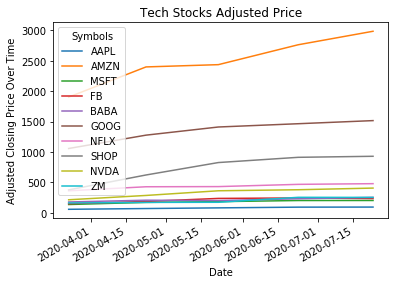

In [3]:
pd.set_option('mode.chained_assignment', None) # ignore warning
# drop all rows if the day is not the 23rd of each month with the exception of May 22th
stock_data_adj = stock_data['Adj Close'] # Adjusted Close is the most accurate stock price
for index,row in stock_data_adj.iterrows():
    current_date = str(index.date())
    current_date_day = str(index.date())[-2:]
    if(str(index.date()) == "2020-05-22"):
        continue
    elif(current_date_day != "23"):
        stock_data_adj.drop(index,inplace = True)

print(stock_data_adj)
plt.figure(figsize = (20,10))
stock_data_adj.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")
plt.show()

Symbols          AAPL         AMZN        MSFT          FB        BABA  \
Date                                                                     
2020-03-23  55.566658  1902.829956  134.301956  148.100006  176.339996   
2020-04-23  68.112923  2399.449951  169.304611  185.130005  205.240005   
2020-05-22  79.188927  2436.879883  181.750183  234.910004  199.699997   
2020-06-23  91.019203  2764.409912  199.973740  242.240005  228.750000   
2020-07-23  92.223587  2986.550049  200.597687  232.600006  251.880005   

Symbols            GOOG        NFLX        SHOP        NVDA          ZM  
Date                                                                     
2020-03-23  1056.619995  360.269989  375.390015  212.393311  159.559998  
2020-04-23  1276.310059  426.700012  620.489990  283.613831  169.089996  
2020-05-22  1410.420044  429.320007  825.169983  360.546387  171.059998  
2020-06-23  1464.410034  466.260010  911.340027  377.644989  252.809998  
2020-07-23  1515.680054  477.579987  

<Figure size 1440x720 with 0 Axes>

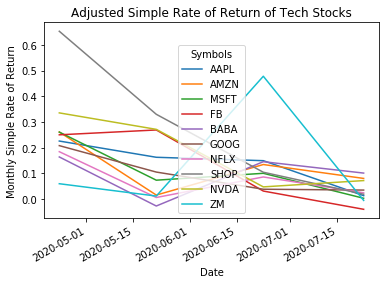

<Figure size 1152x648 with 0 Axes>

In [4]:
monthly_simple_ror = stock_data_adj.pct_change() # calculating returns month to month
print(stock_data_adj)
print(monthly_simple_ror)
plt.figure(figsize = (20,10))
monthly_simple_ror.plot()
plt.xlabel("Date")
plt.ylabel("Monthly Simple Rate of Return")
plt.title("Adjusted Simple Rate of Return of Tech Stocks")
plt.figure(figsize=(16,9))
plt.show()

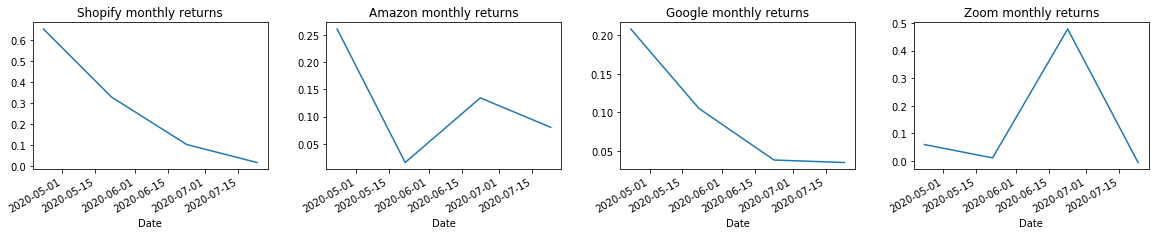

In [5]:
plt.figure(figsize = (20,3))
plt.subplot(1,4,1)
monthly_simple_ror_SHOP = stock_data_adj['SHOP'].pct_change()
plt.title("Shopify monthly returns")
monthly_simple_ror_SHOP.plot()

plt.subplot(1,4,2)
monthly_simple_ror_AMZN = stock_data_adj['AMZN'].pct_change()
plt.title("Amazon monthly returns")
monthly_simple_ror_AMZN.plot()

plt.subplot(1,4,3)
monthly_simple_ror_GOOG = stock_data_adj['GOOG'].pct_change()
plt.title("Google monthly returns")
monthly_simple_ror_GOOG.plot()

plt.subplot(1,4,4)
monthly_simple_ror_ZM = stock_data_adj['ZM'].pct_change()
plt.title("Zoom monthly returns")
monthly_simple_ror_ZM.plot()

plt.subplots_adjust(hspace = 0.7,wspace = 0.25)
plt.show()

Symbols
AAPL    0.137756
AMZN    0.122838
MSFT    0.109381
FB      0.127584
BABA    0.095870
GOOG    0.096571
NFLX    0.075213
SHOP    0.276487
NVDA    0.181484
ZM      0.136025
dtype: float64


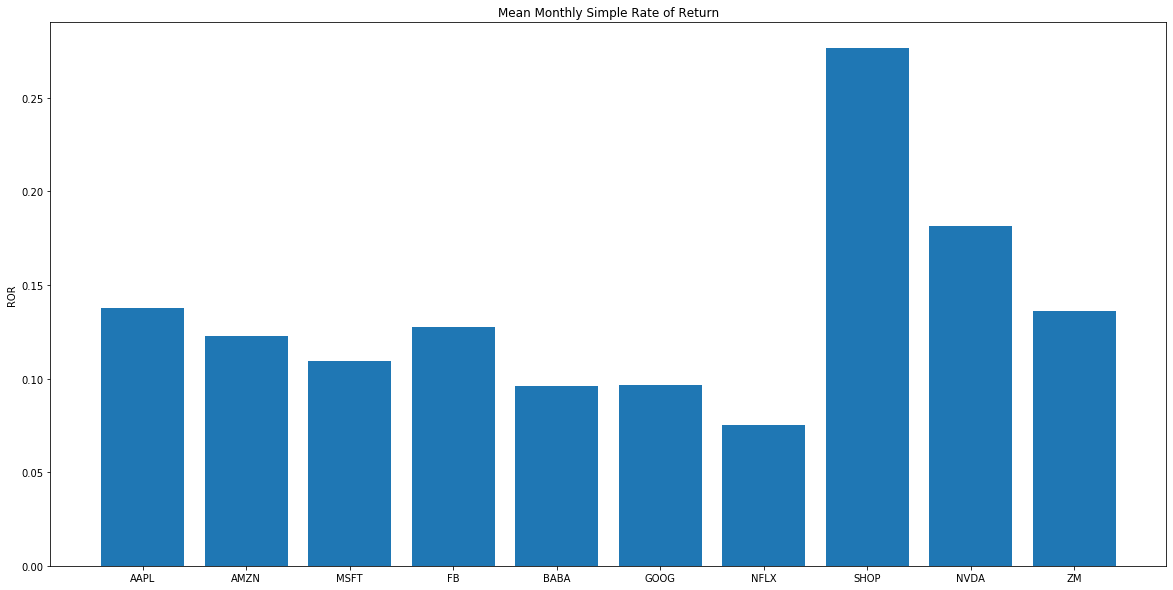

In [6]:
# step 1
mean_return = monthly_simple_ror.mean()
print(mean_return)
# step 2 or use mean_return.keys() as the first bar chart arguement
plt.figure(figsize = (20,10))
plt.bar(mean_return.keys(),mean_return)
plt.ylabel("ROR")
plt.title("Mean Monthly Simple Rate of Return")
plt.show()

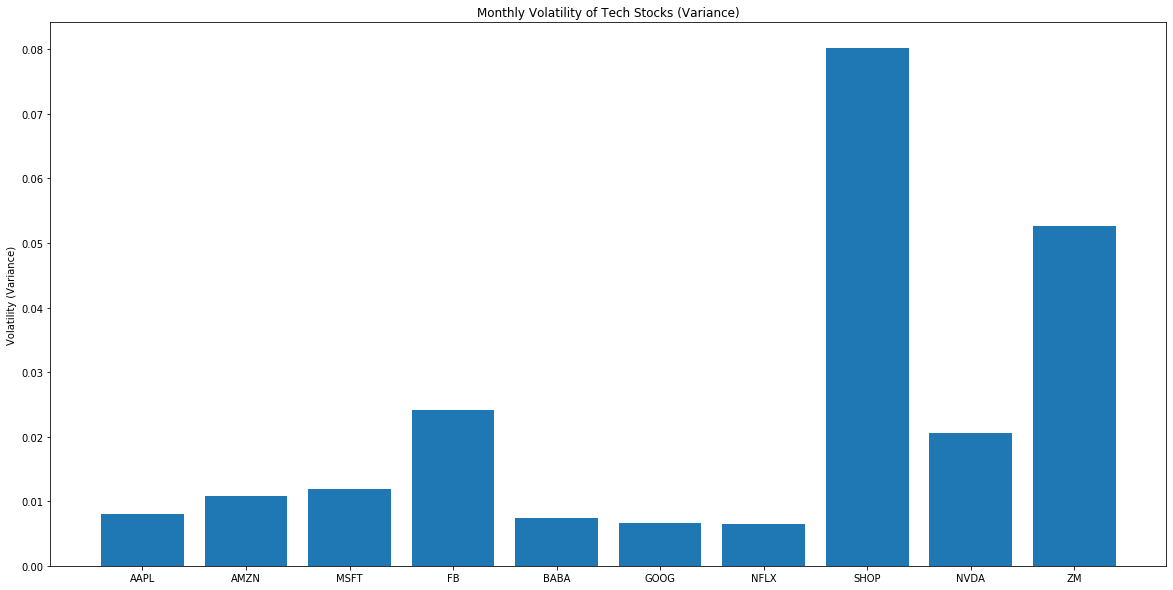

In [7]:
var_return = monthly_simple_ror.var() # calculate monthly variance
plt.figure(figsize = (20,10))
plt.bar(monthly_simple_ror.keys(),var_return)
plt.title("Monthly Volatility of Tech Stocks (Variance)")
plt.ylabel("Volatility (Variance)")
plt.show()

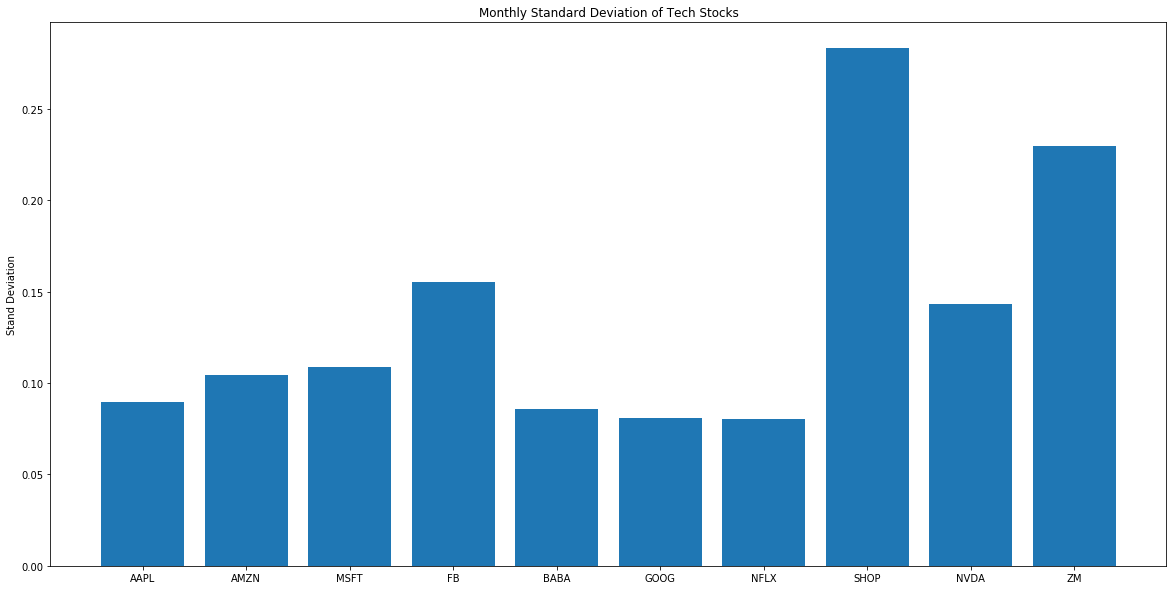

In [8]:
sd_return = monthly_simple_ror.std() # calculate monthly standard deviation
plt.figure(figsize = (20,10))
plt.bar(monthly_simple_ror.keys(),sd_return)
plt.title("Monthly Standard Deviation of Tech Stocks")
plt.ylabel("Stand Deviation")
plt.show()

In [9]:
cov_matrix = monthly_simple_ror.cov() # covariance matrix
print(cov_matrix)

Symbols      AAPL      AMZN      MSFT        FB      BABA      GOOG      NFLX  \
Symbols                                                                         
AAPL     0.008003  0.004974  0.008516  0.011338  0.000953  0.005667  0.004788   
AMZN     0.004974  0.010842  0.009717  0.002586  0.007641  0.005471  0.008260   
MSFT     0.008516  0.009717  0.011845  0.010705  0.004562  0.007869  0.008101   
FB       0.011338  0.002586  0.010705  0.024089 -0.004897  0.010253  0.003697   
BABA     0.000953  0.007641  0.004562 -0.004897  0.007403  0.001105  0.005394   
GOOG     0.005667  0.005471  0.007869  0.010253  0.001105  0.006553  0.004691   
NFLX     0.004788  0.008260  0.008101  0.003697  0.005394  0.004691  0.006467   
SHOP     0.021520  0.018413  0.027992  0.037788  0.003053  0.022755  0.016225   
NVDA     0.009285  0.004910  0.010970  0.020927 -0.002597  0.010817  0.004908   
ZM       0.003918  0.004250  0.001604 -0.012078  0.008769 -0.006930  0.003719   

Symbols      SHOP      NVDA

In [10]:
corr_matrix = monthly_simple_ror.corr() # correlation matrix
print(corr_matrix)

Symbols      AAPL      AMZN      MSFT        FB      BABA      GOOG      NFLX  \
Symbols                                                                         
AAPL     1.000000  0.533944  0.874672  0.816559  0.123763  0.782552  0.665462   
AMZN     0.533944  1.000000  0.857434  0.160031  0.852917  0.649043  0.986410   
MSFT     0.874672  0.857434  1.000000  0.633733  0.487137  0.893220  0.925577   
FB       0.816559  0.160031  0.633733  1.000000 -0.366701  0.816062  0.296158   
BABA     0.123763  0.852917  0.487137 -0.366701  1.000000  0.158632  0.779565   
GOOG     0.782552  0.649043  0.893220  0.816062  0.158632  1.000000  0.720606   
NFLX     0.665462  0.986410  0.925577  0.296158  0.779565  0.720606  1.000000   
SHOP     0.849434  0.624460  0.908194  0.859728  0.125309  0.992638  0.712434   
NVDA     0.723754  0.328800  0.702834  0.940192 -0.210433  0.931808  0.425525   
ZM       0.190772  0.177800  0.064177 -0.338966  0.443945 -0.372898  0.201417   

Symbols      SHOP      NVDA